# K-Means Clustering 

In [19]:
#Import basic packages
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
#Import dataset 
#file = '//Users//chung-tsengwang//Desktop//ALL DATA SCIENCE//Website Projects//Mall Demo//data//raw//Mall_Customers.csv'
file = 'C:\\Users\\Chung-Tseng Wang\\Desktop\\NBA-Rookie-Stat-Predictions\\data\\processed\\combined_processed_college.csv'
college = pd.read_csv(file)
college = college[['year', 'Player','Position','G', 'GS', 'MP','FG', 'FGA',
       'FGP','2P','2PA', '2PP', '3P', '3PA', '3P%','FT', 'FTA', 'FTP','ORB', 'DRB','TRB','AST','STL','BLK'
        ,'TOV','PTS', 'SOS','PER','eFGP','WS']]
college = college.set_index(['Player'])
college.head()

,year,Position,G,GS,MP,FG,FGA,FGP,2P,2PA,...,TRB,AST,STL,BLK,TOV,PTS,SOS,PER,eFGP,WS
Player,,,,,,,,,,,,,,,,,,,,,
Justin Jackson,2018,Guard,6,3.0000,1.30000,0.0,0.3,0.000,0.0,0.3,...,0.5,0.0,0.0,0.0,0.000000,0.0,8.12,-0.1,0.0,-0.1
Joe Harris,2015,Forward,15,1.0000,10.10000,1.3,2.8,0.452,0.7,1.2,...,1.6,0.3,0.2,0.0,0.400000,3.1,-4.83,11.9,56.0,0.2
Kevin Jones,2013,Guard,9,0.0000,1.10000,0.0,0.1,0.000,0.0,0.0,...,0.0,0.1,0.0,0.0,0.000000,0.0,3.24,0.0,0.0,0.0
Andre Drummond,2013,Center,34,30.0000,28.40000,4.6,8.6,0.538,4.6,8.5,...,7.6,0.4,0.8,2.7,1.500000,10.0,8.07,21.9,53.8,2.9
Wendell Carter,2019,Forward,48,69.2525,27.27375,1.1,2.1,0.505,1.0,2.1,...,1.8,0.2,0.4,0.4,1.883666,2.5,6.62,1.2,51.5,1.2


### Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


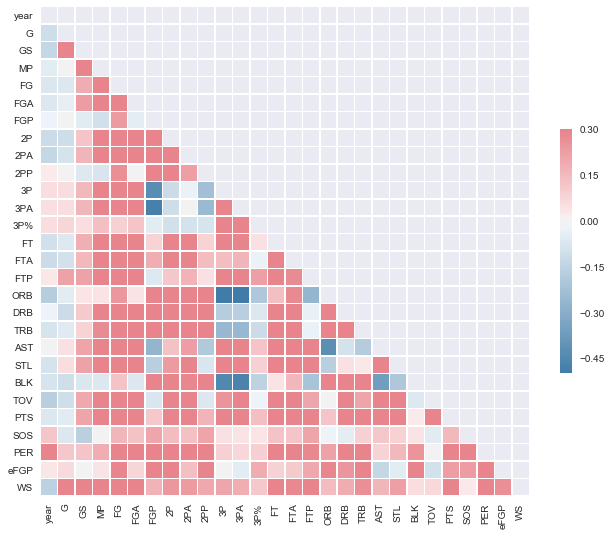

In [66]:
sns.set(style="dark")
corr = college.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True,linewidths=.5, cbar_kws={"shrink": .5}))

In [172]:
#segmenting data 
guards = college[college['Position']=='Guard'].drop(['Position'],axis =1)
forwards = college[college['Position']=='Forward'].drop(['Position'],axis =1)
centers = college[college['Position']=='Center'].drop(['Position'],axis =1)
na = college[college['Position']=='NaN'].drop(['Position'],axis =1)

In [173]:
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.preprocessing import scale
import sklearn.metrics as sm 
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline 

## Building the Model

### Optimizing number of clusters 
Objective: Minimize Within Cluster Sum of Square (WCSS) with the Elbow method. <br>
As the number of cluster increases WCSS decreases.<br> When the number of clusters = number of instances WCSS = 0. <br>
When we graph number of clusters against WCSS we will see an elbow graph.<br>
On this elbow plot, the marginal decrease in WCSS decreases significantly at where the elbow bends.<br>
This point will be our optimal number of clusters. 

In [174]:
from sklearn.preprocessing import StandardScaler
def WCSS(data, k):
    #Takes data and k(number of cluster to test)
    df = data.iloc[:,3:]
    scaler = StandardScaler()
    scaler.fit_transform(df)
    WCSS = []
    for n in range(1, k):
        clustering = (KMeans(n_clusters = n, n_init = 20, tol = 0.0001, random_state = 42, algorithm = 'auto'))
        clustering.fit(df)
        WCSS.append(clustering.inertia_)
    plt.figure(figsize=(20, 10))
    plt.plot(np.arange(1,k), WCSS, 'o')
    plt.plot(np.arange(1,k), WCSS, '-', alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('WCSS vs. Number of Clusters')
    return plt.show()

In [175]:
def clustering(data, k):
    player_name = data.index
    df = data.iloc[:,2:]
    scaler = StandardScaler()
    scaler.fit_transform(df)
    clustering = (KMeans(n_clusters = k, n_init = 20, tol = 0.0001, random_state = 21, algorithm = 'auto'))
    clustering.fit(df)
    labels = clustering.labels_
    centroids = clustering.cluster_centers_
    WCSS = clustering.inertia_
    output = pd.DataFrame(columns = ['Player','Labels'])
    output['Player'] = player_name
    output['Labels'] = clustering.labels_
    return output

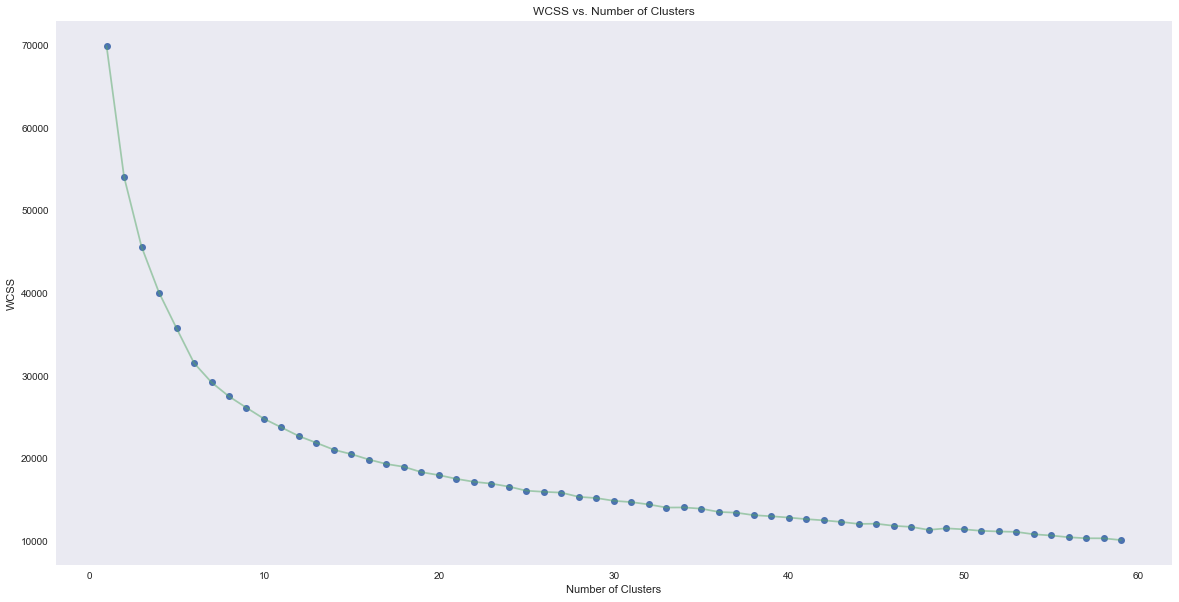

In [176]:
WCSS(guards,60)

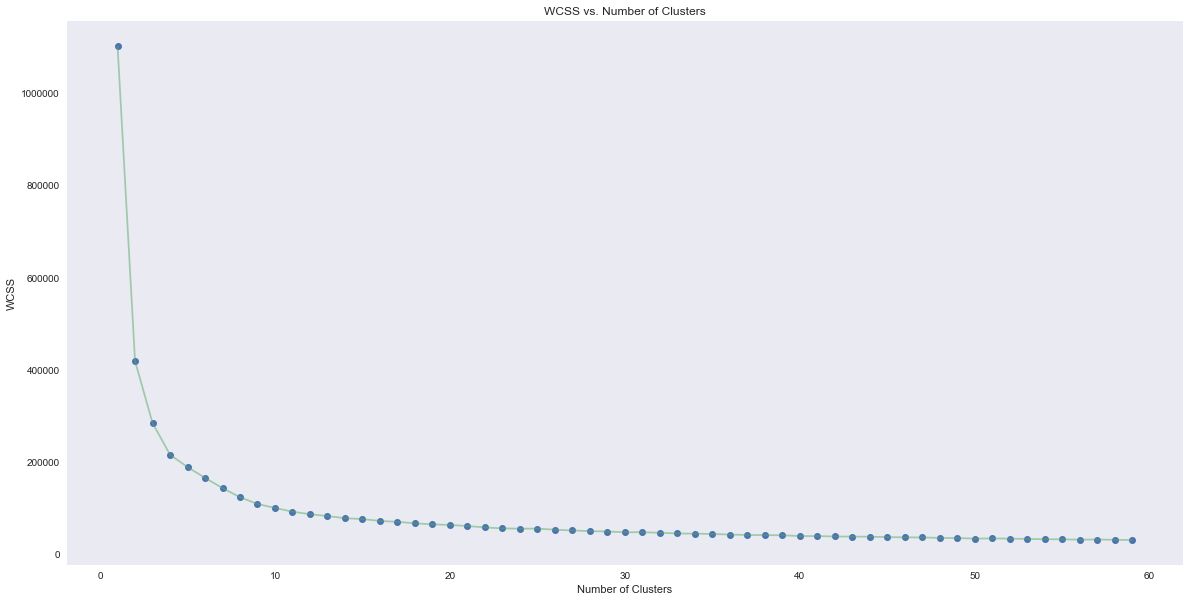

In [83]:
WCSS(forwards,60)

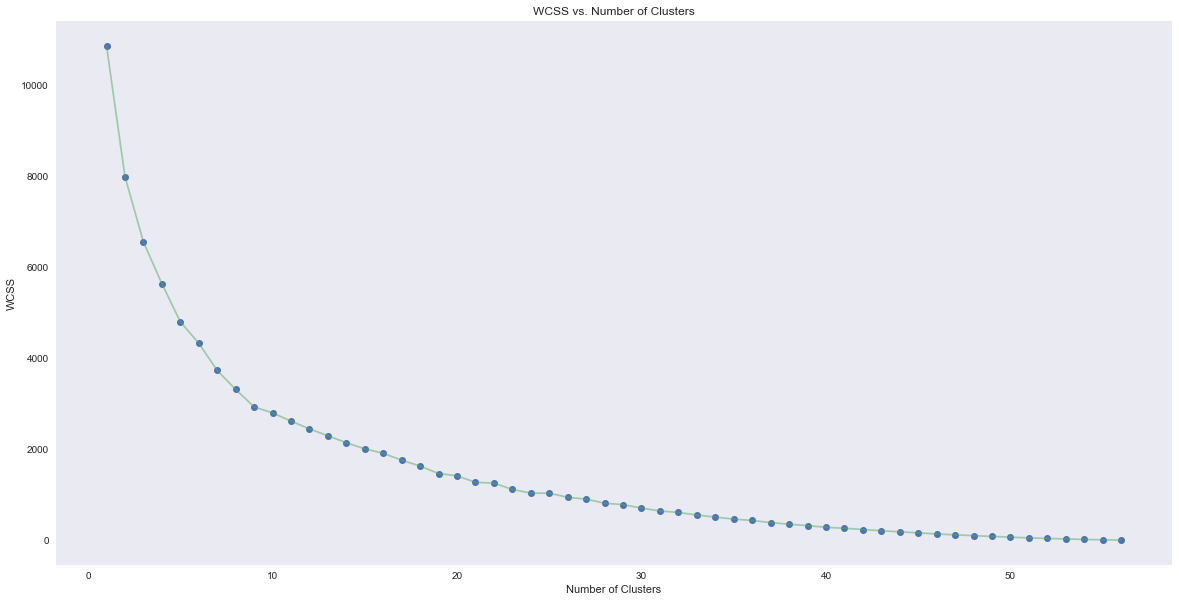

In [177]:
WCSS(centers,57)

In [188]:
guards_output = clustering(guards, 10)
guard_output.head()

,Player,Labels
0,Justin Jackson,7
1,Kevin Jones,7
2,Vince Edwards,2
3,Johnathan Williams,7
4,Sterling Brown,7


In [195]:
forwards_output = clustering(forwards, 10)
forwards_output.head()

,Player,Labels
0,Joe Harris,4
1,Wendell Carter,7
2,James Anderson,4
3,Joey Dorsey,2
4,Aaron Gordon,6


In [196]:
centers_output = clustering(centers, 10)
centers_output.head()

,Player,Labels
0,Andre Drummond,4
1,Arinze Onuaku,0
2,DeAndre Jordan,6
3,Steven Adams,4
4,Bruce Brown,2


In [189]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [181]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [190]:
#Dimensionality reduction packages
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [193]:
def plot_clusters(data,output):
    subSpace = TSNE().fit_transform(data.values)
    plot_embedding(subSpace, output['Labels'], 'K_means Projection Plot', 10)

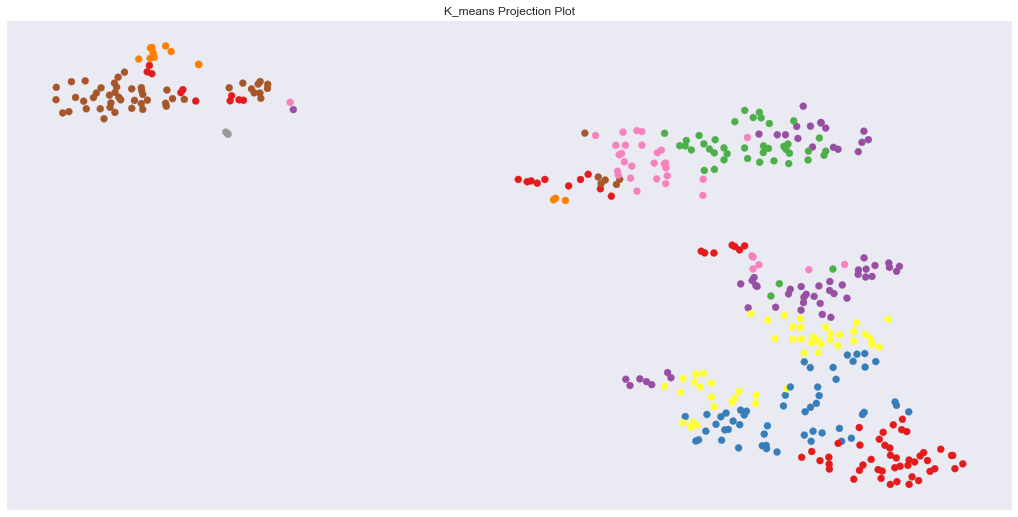

In [194]:
plot_clusters(guards, guards_output)

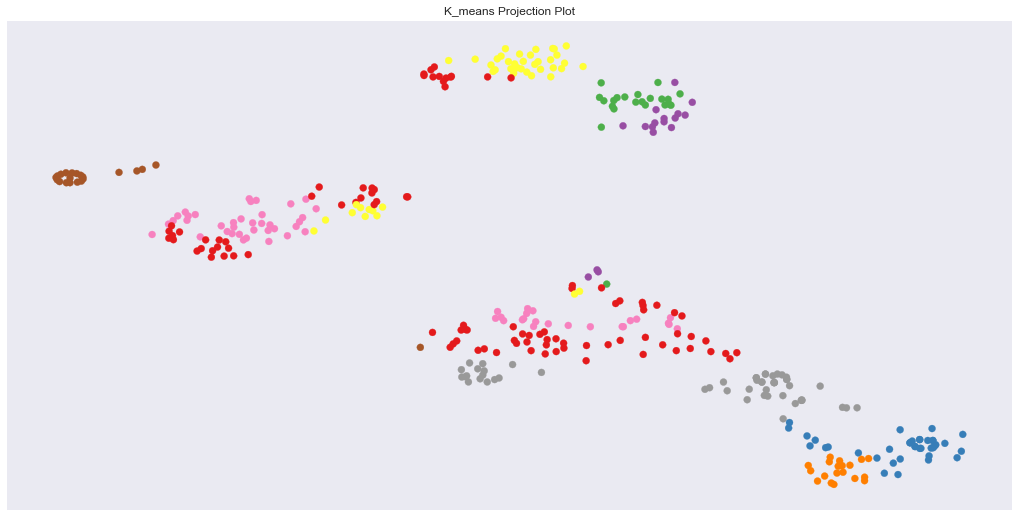

In [197]:
plot_clusters(forwards, forwards_output)

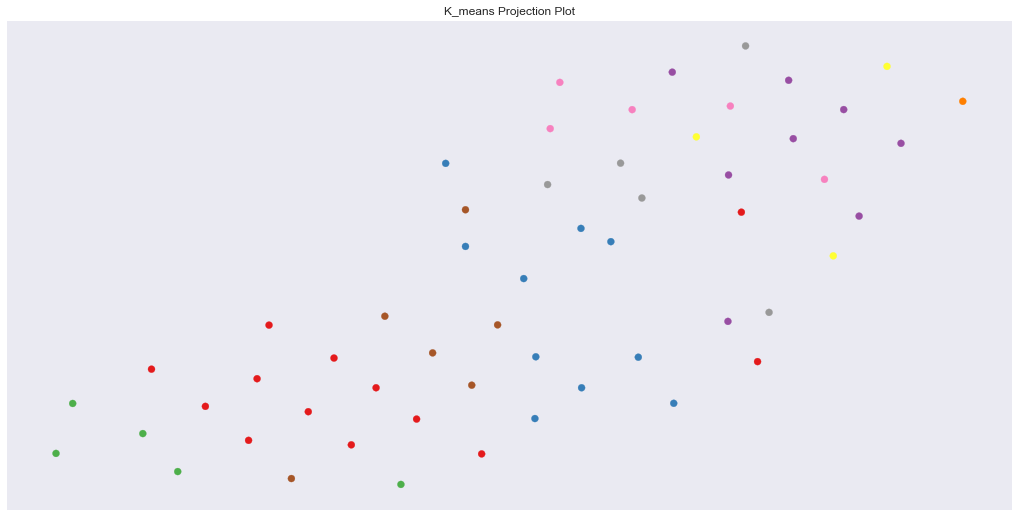

In [199]:
plot_clusters(centers, centers_output)

In [216]:
zion = forwards_output[forwards_output['Player'] == 'Zion Williamson']
zion_label = forwards_output[forwards_output['Labels'] == zion.iloc[0,1]]
zion_label

,Player,Labels
4,Aaron Gordon,6
23,Royce White,6
37,Nerlens Noel,6
49,Jarrett Allen,6
53,Jemerrio Jones,6
93,Kevon Looney,6
111,Zion Williamson,6
112,Chris Boucher,6
113,Justise Winslow,6
121,Jaylen Brown,6


In [213]:
file = 'C:\\Users\\Chung-Tseng Wang\\Desktop\\NBA-Rookie-Stat-Predictions\\data\\processed\\processed_nba.csv'
nba = pd.read_csv(file)
nba.head()

,year,Player,Age,NBA_G,NBA_FGP,NBA_3PP,NBA_FTP,NBA_PTS,NBA_TRB,NBA_AST,NBA_STL,NBA_BLK,NBA_TOV
0,2019,Jaylen Adams,22,34,0.345,0.338,0.778,3.2,1.8,1.9,0.411765,0.147059,0.823529
1,2019,Deng Adel,21,19,0.306,0.261,1.000,1.7,1.0,0.3,0.052632,0.210526,0.315789
2,2019,DeVaughn Akoon-Purcell,25,7,0.300,0.000,0.500,1.0,0.6,0.9,0.285714,0.000000,0.285714
3,2019,Rawle Alkins,21,10,0.333,0.250,0.667,3.7,2.6,1.3,0.100000,0.000000,0.800000
4,2019,Grayson Allen,23,38,0.376,0.323,0.750,5.6,0.6,0.7,0.157895,0.157895,0.868421


In [237]:
zion_label_nba = zion_label.merge(nba, on='Player',how = 'left')
zion_label_nba = zion_label_nba[zion_label_nba['NBA_G'] >= 20]
zion_label_nba.head()

,Player,Labels,year,Age,NBA_G,NBA_FGP,NBA_3PP,NBA_FTP,NBA_PTS,NBA_TRB,NBA_AST,NBA_STL,NBA_BLK,NBA_TOV
0,Aaron Gordon,6,2015.0,19.0,341.0,0.450,0.321,0.707,12.5,6.2,2.2,0.765396,0.639296,1.354839
2,Nerlens Noel,6,2015.0,20.0,300.0,0.523,0.250,0.631,8.2,6.5,1.2,1.376667,1.366667,1.430000
3,Jarrett Allen,6,2018.0,19.0,152.0,0.590,0.183,0.732,9.6,7.0,1.0,0.467105,1.368421,1.217105
5,Kevon Looney,6,2016.0,19.0,204.0,0.595,0.192,0.593,4.5,3.8,1.0,0.465686,0.617647,0.490196
7,Chris Boucher,6,2018.0,25.0,29.0,0.442,0.316,0.867,3.2,2.0,0.1,0.206897,0.827586,0.241379


In [228]:
zion_label_nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 14 columns):
Player     46 non-null object
Labels     46 non-null int32
year       41 non-null float64
Age        41 non-null float64
NBA_G      41 non-null float64
NBA_FGP    41 non-null float64
NBA_3PP    41 non-null float64
NBA_FTP    41 non-null float64
NBA_PTS    41 non-null float64
NBA_TRB    41 non-null float64
NBA_AST    41 non-null float64
NBA_STL    41 non-null float64
NBA_BLK    41 non-null float64
NBA_TOV    41 non-null float64
dtypes: float64(12), int32(1), object(1)
memory usage: 5.2+ KB


In [243]:
zion_stats = pd.DataFrame(columns = ['NBA_FGP', 'NBA_3PP',
       'NBA_FTP', 'NBA_PTS', 'NBA_TRB', 'NBA_AST', 'NBA_STL', 'NBA_BLK',
       'NBA_TOV'])
zion_stats.loc[0] = 0
for n in zion_stats.columns:
    zion_stats[n] = zion_label_nba[n].mean()
zion_stats['Player'] = 'Zion Williamson'
zion_stats.head()

,NBA_FGP,NBA_3PP,NBA_FTP,NBA_PTS,NBA_TRB,NBA_AST,NBA_STL,NBA_BLK,NBA_TOV,Player
0,0.473368,0.306578,0.713105,9.802632,5.160526,1.460526,0.661995,0.58606,1.20147,Zion Williamson
